In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pipeline import DataPreprocessingPipeline

import warnings
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)

from logger import get_logger
logger = get_logger("logs/preprocessing.log")

import os
save_dir = "visualizations_main"
os.makedirs(save_dir, exist_ok=True) 

In [2]:
house_df = pd.read_csv("data/all_data.csv", encoding="utf-8")

df = DataPreprocessingPipeline(house_df=house_df).get_final_df()

2025-03-24 23:15 - INFO - House heating values replaced successfully. (5096, 18)
2025-03-24 23:15 - INFO - House heating values replaced successfully. (5096, 18)
2025-03-24 23:15 - INFO - House heating values replaced successfully. (5096, 18)
2025-03-24 23:15 - INFO - House property_type values replaced successfully. (5086, 18)
2025-03-24 23:15 - INFO - House property_type values replaced successfully. (5086, 18)
2025-03-24 23:15 - INFO - House property_type values replaced successfully. (5086, 18)
2025-03-24 23:15 - INFO - House bathroom_count values replaced successfully. (5077, 18)
2025-03-24 23:15 - INFO - House bathroom_count values replaced successfully. (5077, 18)
2025-03-24 23:15 - INFO - House bathroom_count values replaced successfully. (5077, 18)
2025-03-24 23:15 - INFO - House gross_area values replaced successfully. (5076, 18)
2025-03-24 23:15 - INFO - House gross_area values replaced successfully. (5076, 18)
2025-03-24 23:15 - INFO - House gross_area values replaced succe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3176 entries, 0 to 3175
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   house_description  3176 non-null   object  
 1   house_price        3176 non-null   int64   
 2   property_type      3176 non-null   category
 3   gross_area         3176 non-null   int64   
 4   net_area           3176 non-null   int64   
 5   room_count         3176 non-null   int64   
 6   building_age       3176 non-null   int64   
 7   floor_number       3176 non-null   int64   
 8   total_floors       3176 non-null   int64   
 9   heating            3176 non-null   category
 10  bathroom_count     3176 non-null   int64   
 11  furnished          3176 non-null   category
 12  usage_status       3176 non-null   object  
 13  credit_eligible    3176 non-null   category
 14  deed_status        3176 non-null   category
 15  exchange           3176 non-null   object  
 16  house_

In [4]:
df.sample(10)

,house_description,house_price,property_type,gross_area,net_area,room_count,building_age,floor_number,total_floors,heating,...,furnished,usage_status,credit_eligible,deed_status,exchange,house_url,living_room_count,province,district,neighborhood
131,KURTULUŞ MAH. VALİLİK KARŞISI BULVAR CEPHE'Lİ ...,2750000,Satılık Daire,120,90,2,30,3,9,Isıtma Yok,...,Eşyalı Değil,Kiracılı,Krediye Uygun,Kat Mülkiyeti,Evet,https://www.hepsiemlak.com/adana-seyhan-kurtul...,1,adana,seyhan,kurtuluş
1047,Fatıh Mahllesinde 0 Ayarında Daire,2400000,Satılık Daire,140,130,3,4,4,14,Klimalı,...,Eşyalı Değil,Mülk Sahibi Oturuyor,Krediye Uygun,Kat İrtifakı,Var,https://www.emlakjet.com/ilan/fatih-mahllesind...,1,adana,seyhan,fatih
1506,Tİ GROUP 3+1 KAPALI MUTFAK DOĞALGAZ FULL+FULL ...,5295000,Satılık Daire,180,160,3,0,5,8,Kombi,...,Eşyalı Değil,Boş,Krediye Uygun Değil,Kat Mülkiyeti,Hayır,https://www.hepsiemlak.com/adana-cukurova-samb...,1,adana,çukurova,şambayadı
508,PINAR MAH BİRBİÇER YAKINI 2+1+KAP.MUTFAK HASAR...,2650000,Satılık Daire,90,75,2,7,1,14,Kombi,...,Eşyalı Değil,Kiracılı,Krediye Uygun,Kat Mülkiyeti,Evet,https://www.hepsiemlak.com/adana-seyhan-pinar-...,1,adana,seyhan,pınar
137,ADANA DÖŞEME MAH. MASRAFSIZ SATILIK 4+1 - 17...,3175000,Satılık Daire,175,155,4,35,3,10,Kombi,...,Eşyalı Değil,Mülk Sahibi,Krediye Uygun,Kat Mülkiyeti,Hayır,https://www.hepsiemlak.com/adana-seyhan-doseme...,1,adana,seyhan,döşeme
339,REMAY'DAN FATİH'DE SATILIK 3+1 GENİŞ K.MUTFAK ...,2400000,Satılık Daire,135,120,3,5,7,14,Isıtma Yok,...,Eşyalı Değil,Mülk Sahibi,Krediye Uygun,Kat İrtifakı,Hayır,https://www.hepsiemlak.com/adana-seyhan-fatih-...,1,adana,seyhan,fatih
2206,GÜNEY EMLAK'DAN-*- BELEDİYE AYNI-*-97 NET OTURUM,2390000,Satılık Daire,140,97,2,4,6,12,Kombi,...,Eşyalı Değil,Boş,Krediye Uygun,Kat Mülkiyeti,Hayır,https://www.hepsiemlak.com/adana-saricam-mehme...,1,adana,sarıçam,ersoy
1382,ÖZCAN GYO’DAN KABASAKALDA ULTA LÜKS SİTE İÇERİ...,6000000,Satılık Daire,175,140,3,0,5,10,Kombi,...,Eşyalı Değil,Boş,Krediye Uygun,Kat İrtifakı,Bilgi yok,https://www.hepsiemlak.com/adana-cukurova-kaba...,1,adana,çukurova,kabasakal
1243,BEYAZEVLERDE GENİŞ GÜNEY OTO PARKLI CAZİP SA...,3500000,Satılık Daire,200,170,3,30,5,14,Isıtma Yok,...,Eşyalı Değil,Boş,Krediye Uygun,Kat İrtifakı,Hayır,https://www.hepsiemlak.com/adana-cukurova-beya...,1,adana,çukurova,beyazevler
1482,EFOR DAN HASARSIZ HUZUREVLERİNDE 3+1 DOĞALGAZL...,3950000,Satılık Daire,175,160,3,16,7,9,Kombi,...,Eşyalı Değil,Boş,Krediye Uygun,Kat Mülkiyeti,Evet,https://www.hepsiemlak.com/adana-cukurova-huzu...,1,adana,çukurova,huzurevleri


In [5]:
df["building_age"].unique()

array([ 6,  4, 25,  7,  3, 10,  8,  5, 14,  1,  2, 50, 30, 20, 16, 15, 12,
        9, 21, 38,  0, 23, 35, 18, 28, 29, 11, 22, 26, 33, 31, 40, 37, 36,
       32, 27, 13, 39, 24, 44, 45, 17, 19])

In [6]:
df_num = df.select_dtypes(include="int64")

In [7]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
house_price,3176.0,2.986231e+06,1.404756e+06,13750.0,1950000.0,2790000.0,3600000.0,8850000.0
gross_area,3176.0,1.313870e+02,4.658064e+01,35.0,100.0,135.0,165.0,250.0
net_area,3176.0,1.091322e+02,4.053393e+01,28.0,80.0,115.0,140.0,225.0
room_count,3176.0,2.523615e+00,8.433583e-01,1.0,2.0,3.0,3.0,5.0
building_age,3176.0,9.453401e+00,1.049480e+01,0.0,0.0,5.0,20.0,50.0
floor_number,3176.0,5.283375e+00,3.727276e+00,-3.0,2.0,5.0,8.0,17.0
total_floors,3176.0,1.001354e+01,3.459116e+00,1.0,8.0,10.0,13.0,20.0
bathroom_count,3176.0,1.395781e+00,4.890948e-01,1.0,1.0,1.0,2.0,2.0
living_room_count,3176.0,9.949622e-01,7.920748e-02,0.0,1.0,1.0,1.0,2.0


In [8]:
df_num.loc[df["net_area"]==35]

,house_price,gross_area,net_area,room_count,building_age,floor_number,total_floors,bathroom_count,living_room_count
114,1250000,50,35,1,15,0,10,1,1
823,2250000,45,35,1,0,1,6,1,1
912,2250000,40,35,1,0,1,6,1,1
985,1725000,50,35,1,0,7,10,1,1
1901,1250000,40,35,1,0,4,8,1,1
2066,1090000,40,35,1,0,11,13,1,1
2112,1250000,40,35,1,0,7,8,1,1
2140,1215000,50,35,1,0,5,9,1,1
2144,1185000,45,35,1,0,5,11,1,1
2239,1000000,40,35,1,5,3,4,1,1


In [9]:
# for column in df_num:
#     print()
#     print(f"{column} Ortalama : {df[column].mean()}")
#     print(f"{column} Dolu Gözlem Sayısı : {df[column].count()}")
#     print(f"{column} Maksimum Değer : {df[column].max()}")
#     print(f"{column} Minimum Değer : {df[column].min()}")
#     print(f"{column} Medyan : {df[column].median()}")
#     print(f"{column} Standart Sapma : {df[column].std()}")

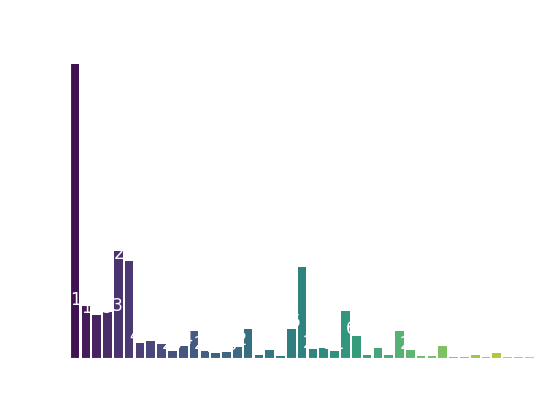

In [10]:
counts = df["building_age"].value_counts()

plt.figure(figsize=(6, 4)) 
ax = sns.barplot(x=counts.index, y=counts.values, palette="viridis")

plt.xlabel("Bina Yaş Aralıkları", fontsize=12, color="white")
plt.ylabel("Bina Sayısı", fontsize=12, color="white")
plt.suptitle("Farklı Yaş Gruplarındaki Binaların Dağılımı", fontsize=15, color="white")

ax.tick_params(axis="x", colors="white")  
ax.tick_params(axis="y", colors="white")  

ax.set_facecolor("none") 
plt.gcf().set_facecolor("none")  


ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_color("white")
ax.spines["bottom"].set_color("white")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='white', 
                xytext=(0, 5), textcoords='offset points')

save_path = os.path.join(save_dir, "building_age.png")
plt.savefig(save_path, transparent=True, dpi=300, bbox_inches="tight") 

plt.show()


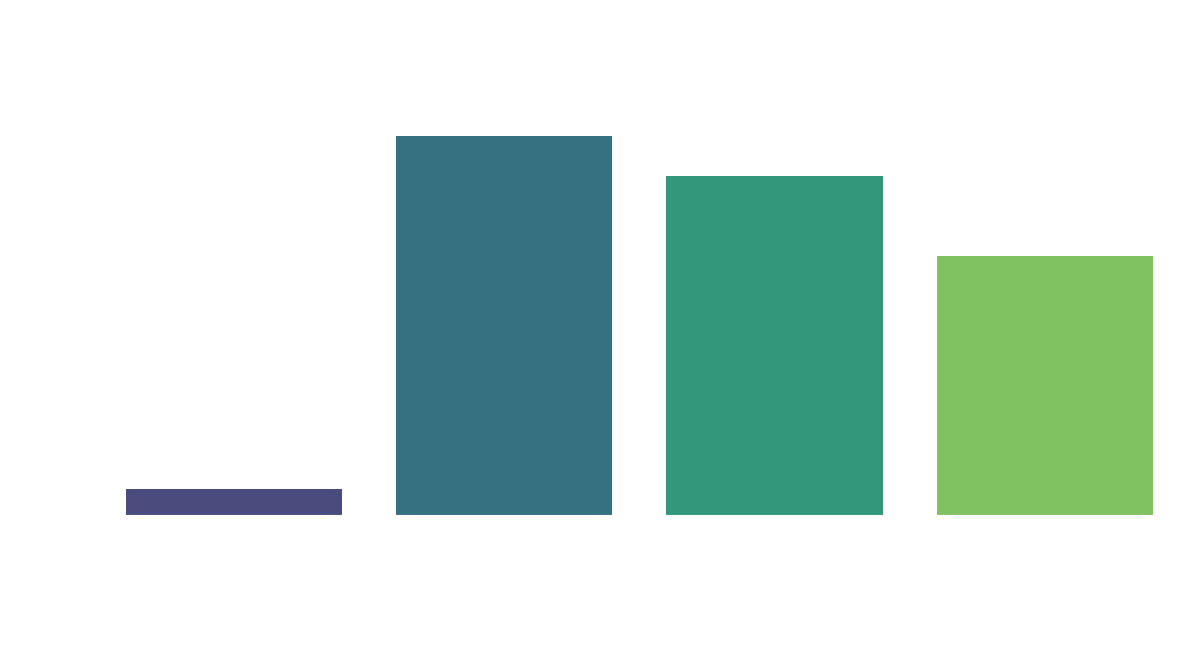

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

neighborhood_counts = df["district"].value_counts().reset_index()
neighborhood_counts.columns = ["district", "count"]


g = sns.catplot(
    x="district", 
    y="count", 
    data=neighborhood_counts, 
    kind="bar", 
    height=6,
    aspect=2,
    palette="viridis"
)


g.set_axis_labels("Mahalleler", "Satılık Ev Sayısı", fontsize=18)
g.figure.suptitle("Mahallelere Göre Satılık Ev Sayısı", fontsize=22, y=1.08, color="white")


g.figure.patch.set_alpha(0)
plt.gca().patch.set_alpha(0) 


for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=14, color="white")  
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, color="white")  
    ax.xaxis.label.set_color("white")  
    ax.yaxis.label.set_color("white")  
    ax.xaxis.label.set_fontsize(18)  
    ax.yaxis.label.set_fontsize(18)  
    ax.title.set_color("white")  
    ax.spines["bottom"].set_color("white")  
    ax.spines["left"].set_color("white")  
    ax.tick_params(axis="x", colors="white")  
    ax.tick_params(axis="y", colors="white")  

plt.tight_layout()  


save_path = os.path.join(save_dir, "house_count_per_neighborhood.png")
plt.savefig(save_path, transparent=True, dpi=300, bbox_inches="tight")  

plt.show()


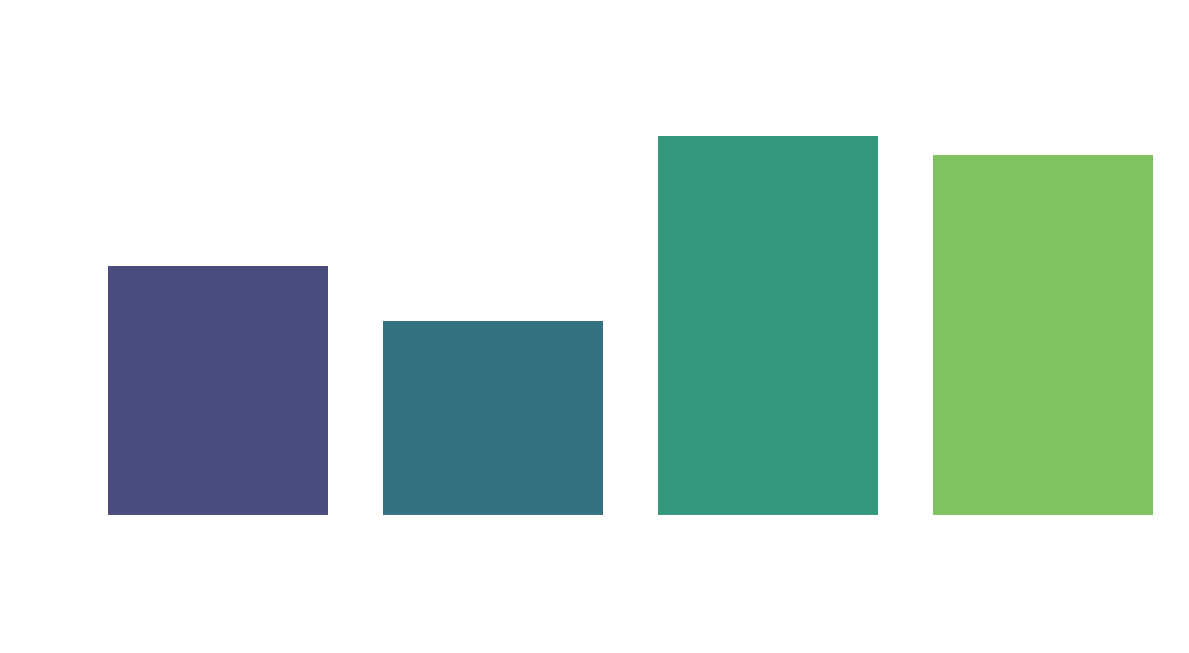

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(
    x="district", 
    y="house_price", 
    data=df, 
    kind="bar", 
    estimator=np.mean,
    errorbar=None,
    height=6,
    aspect=2,
    palette="viridis"
)


g.set_axis_labels("Mahalleler", "Ortalama Ev Fiyatı (Milyon TL)", fontsize=18)
g.figure.suptitle("Mahallelere Göre Ortalama Ev Fiyatları", fontsize=22, y=1.08, color="white")


g.figure.patch.set_alpha(0)
plt.gca().patch.set_alpha(0) 


for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=14, color="white") 
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, color="white") 
    ax.xaxis.label.set_color("white")  
    ax.yaxis.label.set_color("white")  
    ax.xaxis.label.set_fontsize(18)  
    ax.yaxis.label.set_fontsize(18)  
    ax.title.set_color("white")  
    ax.spines["bottom"].set_color("white")  
    ax.spines["left"].set_color("white")  
    ax.tick_params(axis="x", colors="white")  
    ax.tick_params(axis="y", colors="white")  

plt.tight_layout()  

save_path = os.path.join(save_dir, "average_house_price.png")
plt.savefig(save_path, transparent=True, dpi=300, bbox_inches="tight") 
plt.show()


In [13]:
df.loc[df["neighborhood"]=="Sugözü"]

,house_description,house_price,property_type,gross_area,net_area,room_count,building_age,floor_number,total_floors,heating,...,furnished,usage_status,credit_eligible,deed_status,exchange,house_url,living_room_count,province,district,neighborhood


In [14]:
df["house_price"].describe()

count    3.176000e+03
mean     2.986231e+06
std      1.404756e+06
min      1.375000e+04
25%      1.950000e+06
50%      2.790000e+06
75%      3.600000e+06
max      8.850000e+06
Name: house_price, dtype: float64

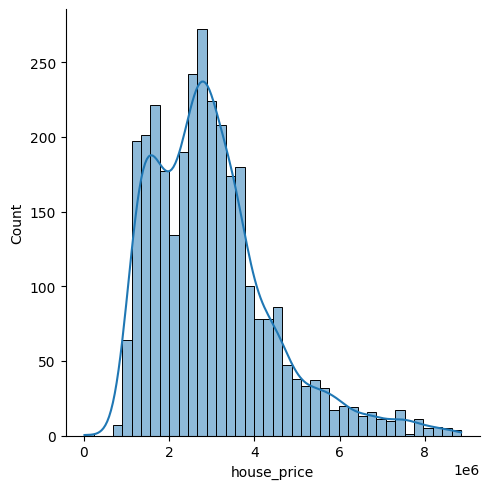

In [15]:
sns.displot(df["house_price"], kde=True)

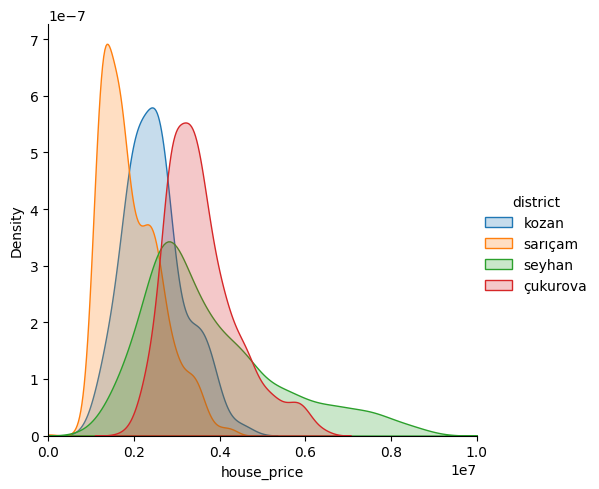

In [16]:
(sns
 .FacetGrid(df, 
               hue="district",
               height=5,
               xlim=(0,10_000_000)).map(sns.kdeplot, "house_price", fill=True).add_legend());

In [17]:
df.groupby("district")["house_price"].mean()

district
kozan       2.472530e+06
sarıçam     1.922759e+06
seyhan      3.765718e+06
çukurova    3.574540e+06
Name: house_price, dtype: float64

In [18]:
df.columns

Index(['house_description', 'house_price', 'property_type', 'gross_area',
       'net_area', 'room_count', 'building_age', 'floor_number',
       'total_floors', 'heating', 'bathroom_count', 'furnished',
       'usage_status', 'credit_eligible', 'deed_status', 'exchange',
       'house_url', 'living_room_count', 'province', 'district',
       'neighborhood'],
      dtype='object')

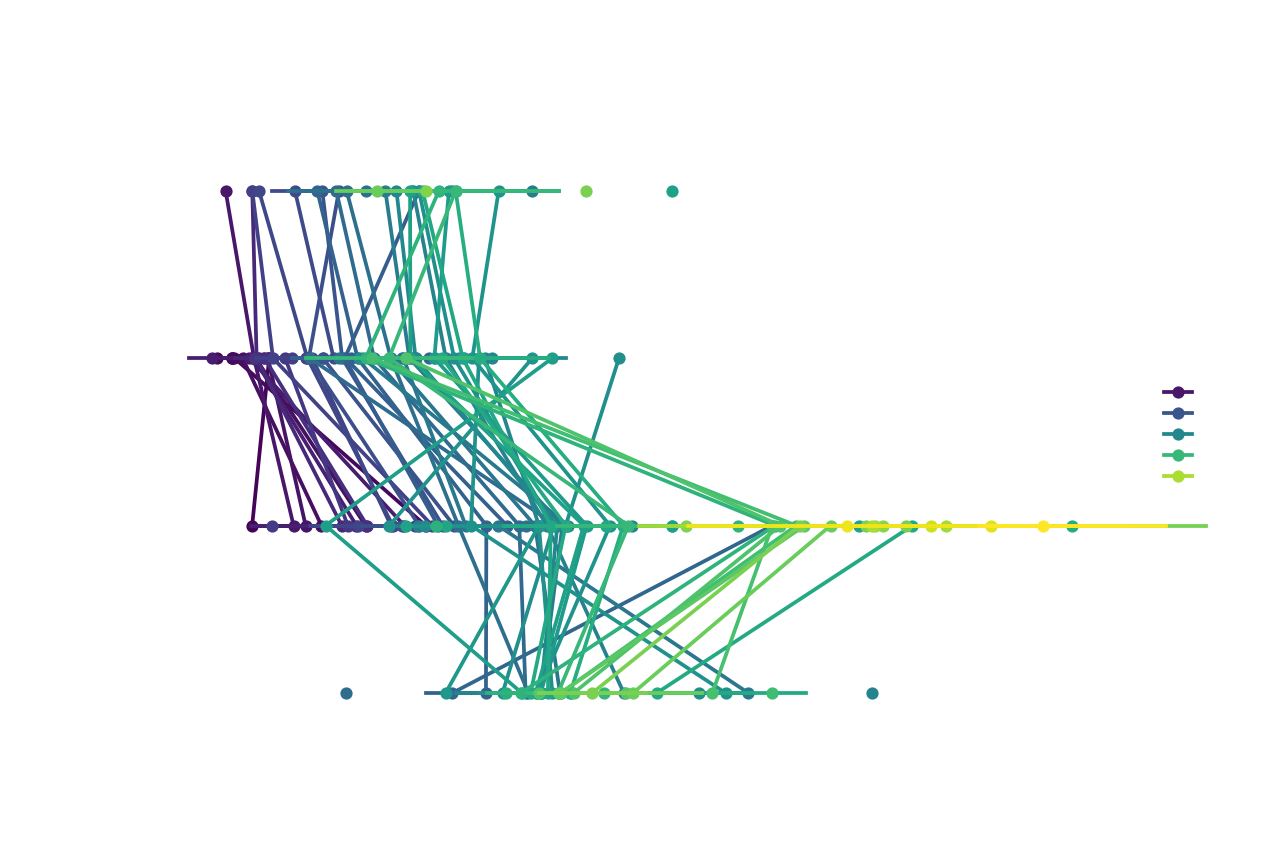

In [19]:
g = sns.catplot(
    y="district",
    x="house_price",
    hue="net_area",  
    kind="point",  
    data=df,
    height=8,  
    aspect=1.5,
    palette="viridis"
)

g.set_axis_labels("Ev Fiyatları (Milyon TL)", "Mahalleler", fontsize=16, color="white")  
g.figure.suptitle("Mahallelere ve Net Kullanım Alanına Göre Ev Fiyatları", fontsize=20, y=1.05, color="white")  


g.figure.patch.set_alpha(0) 
plt.gca().patch.set_alpha(0)


for ax in g.axes.flatten():
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, color="white")  
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, color="white") 
    ax.xaxis.label.set_color("white")  
    ax.yaxis.label.set_color("white")  
    ax.xaxis.label.set_fontsize(18) 
    ax.yaxis.label.set_fontsize(18)
    ax.title.set_color("white")  
    ax.spines["bottom"].set_color("white") 
    ax.spines["left"].set_color("white") 
    ax.tick_params(axis="x", colors="white") 
    ax.tick_params(axis="y", colors="white") 


if g._legend is not None:
    g._legend.set_title("Net Alan m²", prop={"size": 14, "weight": "bold"})
    g._legend.get_title().set_color("white") 

    for text in g._legend.get_texts():
        text.set_color("white") 

plt.tight_layout()  

save_path = os.path.join(save_dir, "neighborhood_house_prices_by_net_area.png")
plt.savefig(save_path, transparent=True, dpi=300, bbox_inches="tight")
plt.show()


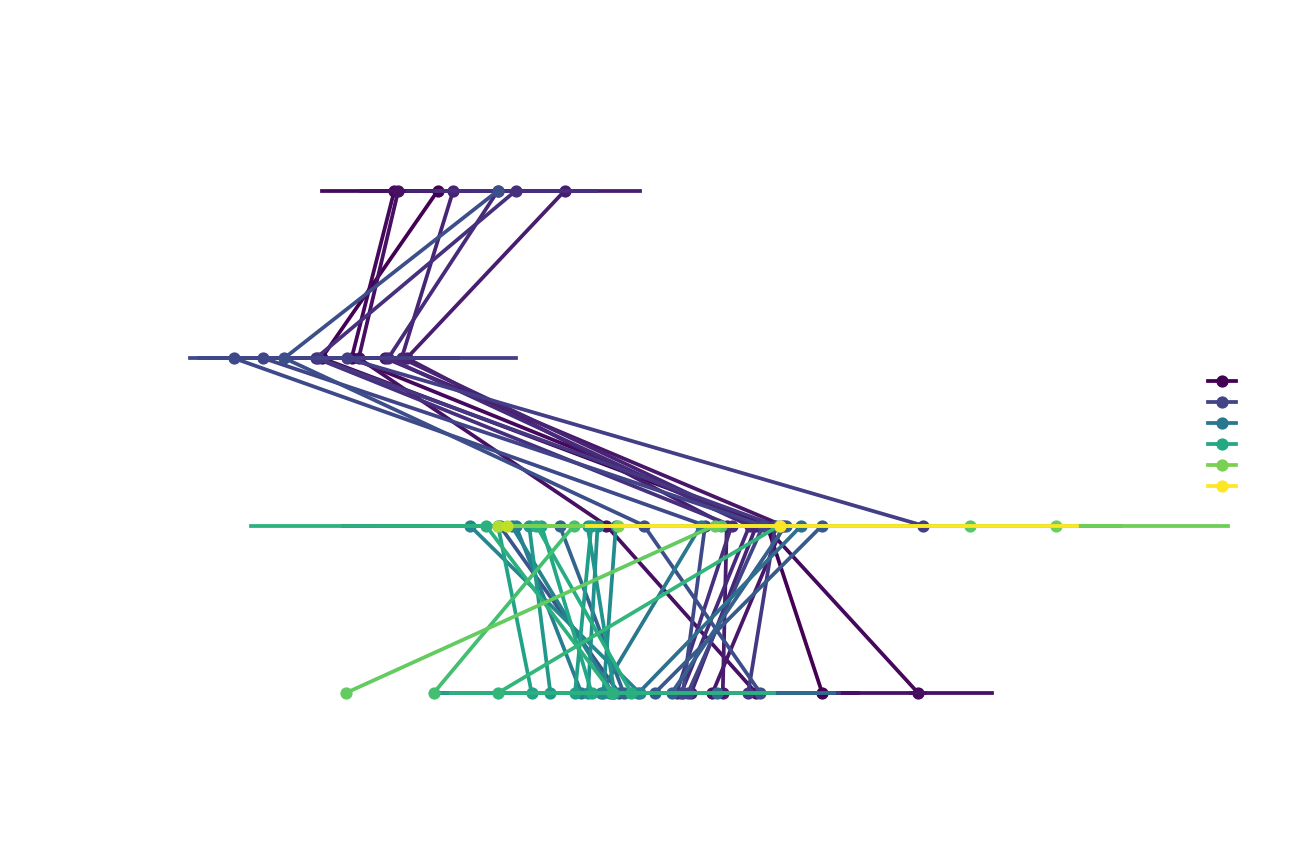

In [20]:
g = sns.catplot(
    y="district",
    x="house_price",
    hue="building_age",  
    kind="point",  
    data=df,
    height=8,  
    aspect=1.5,
    palette="viridis"
)

g.set_axis_labels("Ev Fiyatları (Milyon TL)", "Mahalleler", fontsize=16, color="white")  
g.figure.suptitle("Yaş Gruplarına Göre Mahalle Bazlı Ev Fiyatları", fontsize=20, y=1.05, color="white")  


g.figure.patch.set_alpha(0) 
plt.gca().patch.set_alpha(0)


for ax in g.axes.flatten():
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, color="white") 
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, color="white")
    ax.yaxis.label.set_color("white")  
    ax.xaxis.label.set_fontsize(18)
    ax.yaxis.label.set_fontsize(18)
    ax.title.set_color("white")  
    ax.spines["bottom"].set_color("white")
    ax.spines["left"].set_color("white")
    ax.tick_params(axis="x", colors="white")
    ax.tick_params(axis="y", colors="white") 


if g._legend is not None:
    g._legend.set_title("Bina Yaşı", prop={"size": 14, "weight": "bold"}) 
    g._legend.get_title().set_color("white") 

    for text in g._legend.get_texts():
        text.set_color("white") 

plt.tight_layout()  
save_path = os.path.join(save_dir, "neighborhood_house_prices_by_building_age.png")
plt.savefig(save_path, transparent=True, dpi=300, bbox_inches="tight")
plt.show()


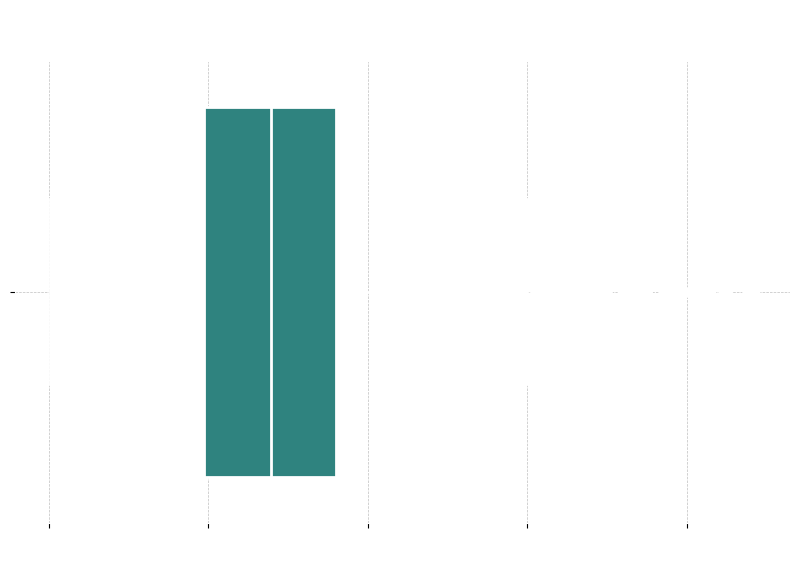

In [21]:
plt.figure(figsize=(10, 6), facecolor="none")  

sns.boxplot(
    x=df["house_price"], 
    palette="viridis",
    linewidth=2.5,
    boxprops={"edgecolor": "white", "linewidth": 2}, 
    whiskerprops={"color": "white", "linewidth": 2},  
    capprops={"color": "white", "linewidth": 2},  
    medianprops={"color": "white", "linewidth": 2},
    flierprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "white", "markersize": 6}
)

plt.title("Ev Fiyatlarının İstatistiksel Dağılımı", fontsize=18, color="white", pad=20)  
plt.xlabel("Ev Fiyatları (Milyon TL)", fontsize=16, color="white")  
plt.xticks(fontsize=12, color="white")  
plt.yticks(fontsize=12, color="white")  

plt.gca().spines["bottom"].set_color("white")
plt.gca().spines["left"].set_color("white")
plt.gca().spines["top"].set_color("white")
plt.gca().spines["right"].set_color("white")

plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.5)

plt.gca().patch.set_alpha(0)  

plt.gca().xaxis.get_offset_text().set_visible(False)


save_path = os.path.join(save_dir, "house_price_distribution.png")
plt.savefig(save_path, transparent=True, dpi=300, bbox_inches="tight")

plt.show()


In [22]:
df.columns

Index(['house_description', 'house_price', 'property_type', 'gross_area',
       'net_area', 'room_count', 'building_age', 'floor_number',
       'total_floors', 'heating', 'bathroom_count', 'furnished',
       'usage_status', 'credit_eligible', 'deed_status', 'exchange',
       'house_url', 'living_room_count', 'province', 'district',
       'neighborhood'],
      dtype='object')

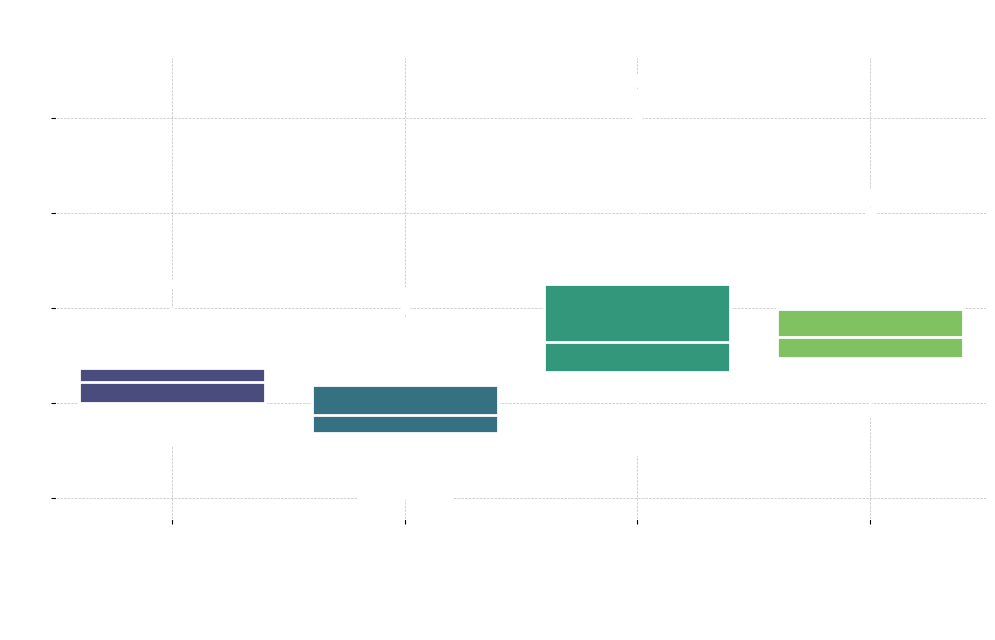

In [23]:
plt.figure(figsize=(12, 6), facecolor="none")

sns.boxplot(
    x="district", 
    y="house_price", 
    data=df,
    palette="viridis",
    linewidth=2.5,
    boxprops={"edgecolor": "white", "linewidth": 2}, 
    whiskerprops={"color": "white", "linewidth": 2},  
    capprops={"color": "white", "linewidth": 2},  
    medianprops={"color": "white", "linewidth": 2},
    flierprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "white", "markersize": 6}
)

plt.xticks(rotation=90, fontsize=12, color="white")  
plt.yticks(fontsize=12, color="white")  
plt.xlabel("Mahalleler", fontsize=16, color="white")  
plt.ylabel("Ev Fiyatları (Milyon Tl)", fontsize=16, color="white")  
plt.title("Mahallelere Göre Ev Fiyatları", fontsize=18, color="white", pad=20)  

plt.gca().spines["bottom"].set_color("white")
plt.gca().spines["left"].set_color("white")
plt.gca().spines["top"].set_color("white")
plt.gca().spines["right"].set_color("white")

plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.5)

plt.gca().patch.set_alpha(0)
plt.gca().yaxis.get_offset_text().set_visible(False)


save_path = os.path.join(save_dir, "house_prices_by_neighborhood.png")
plt.savefig(save_path, transparent=True, dpi=300, bbox_inches="tight")

plt.show()


<Figure size 800x500 with 0 Axes>

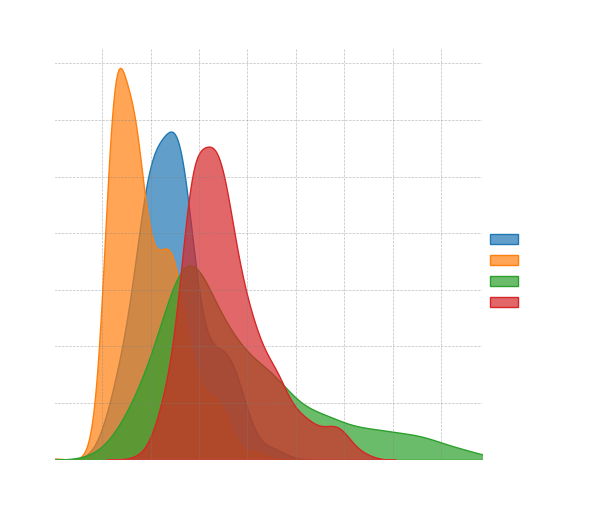

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

plt.figure(figsize=(8, 5), facecolor="none")

g = (sns
     .FacetGrid(df, hue="district", height=5, xlim=(0, df["house_price"].max()))
     .map(sns.kdeplot, "house_price", fill=True, alpha=0.7)
     .add_legend()
)

g.fig.patch.set_alpha(0)  
g.ax.set_facecolor("none")  

g.ax.set_title("Mahallelere Göre Ev Fiyat Yoğunluğu", fontsize=16, color="white", pad=15)
g.ax.set_xlabel("Ev Fiyatları", fontsize=14, color="white")
g.ax.set_ylabel("Yoğunluk", fontsize=14, color="white")


if g.legend is not None:
    g.legend.set_title("Mahalle", prop={"size": 12})
    g.legend.get_title().set_color("white")
    for text in g.legend.get_texts():
        text.set_color("white")


g.ax.spines["bottom"].set_color("white")
g.ax.spines["left"].set_color("white")
g.ax.spines["top"].set_color("white")
g.ax.spines["right"].set_color("white")

g.ax.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.5)
g.ax.tick_params(axis="x", colors="white")
g.ax.tick_params(axis="y", colors="white")


g.ax.xaxis.get_offset_text().set_color("white")


save_path = os.path.join(save_dir, "house_price_density.png")
plt.savefig(save_path, transparent=True, dpi=300, bbox_inches="tight")

plt.show()


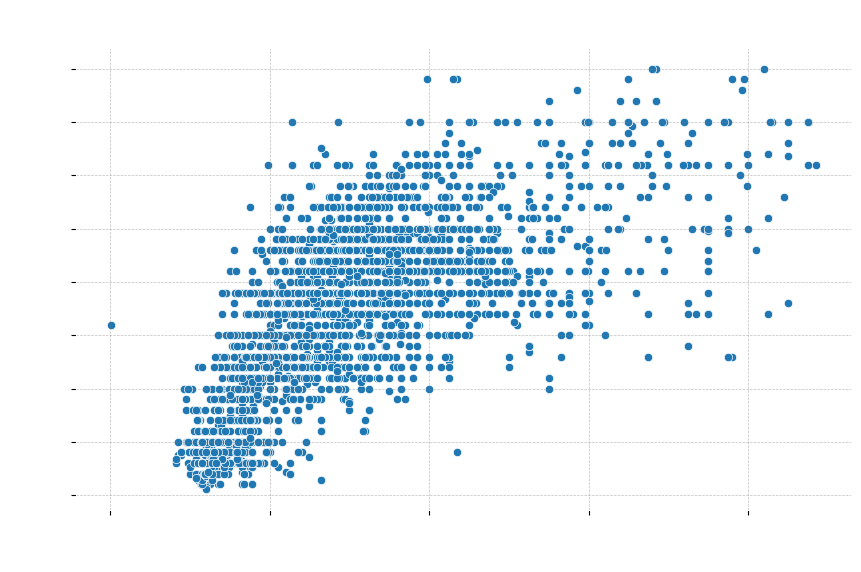

In [25]:
plt.figure(figsize=(10, 6), facecolor="none")

sns.scatterplot(
    x="house_price", 
    y="net_area", 
    data=df,
    palette="viridis", 
    edgecolor="white"
)

plt.xlabel("Ev Fiyatları (Milyon TL)", fontsize=14, color="white")  
plt.ylabel("Net Alan (m²)", fontsize=14, color="white")  
plt.title("Ev Fiyatlarına Göre Net Alan Dağılımı", fontsize=16, color="white", pad=15)  

plt.xticks(fontsize=12, color="white")  
plt.yticks(fontsize=12, color="white")  

plt.gca().spines["bottom"].set_color("white")
plt.gca().spines["left"].set_color("white")
plt.gca().spines["top"].set_color("white")
plt.gca().spines["right"].set_color("white")

plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.5)

plt.gca().patch.set_alpha(0)
plt.gca().yaxis.get_offset_text().set_color("white")
plt.gca().xaxis.get_offset_text().set_color("white")


save_path = os.path.join(save_dir, "house_price_vs_net_area.png")
plt.savefig(save_path, transparent=True, dpi=300, bbox_inches="tight")

plt.show()


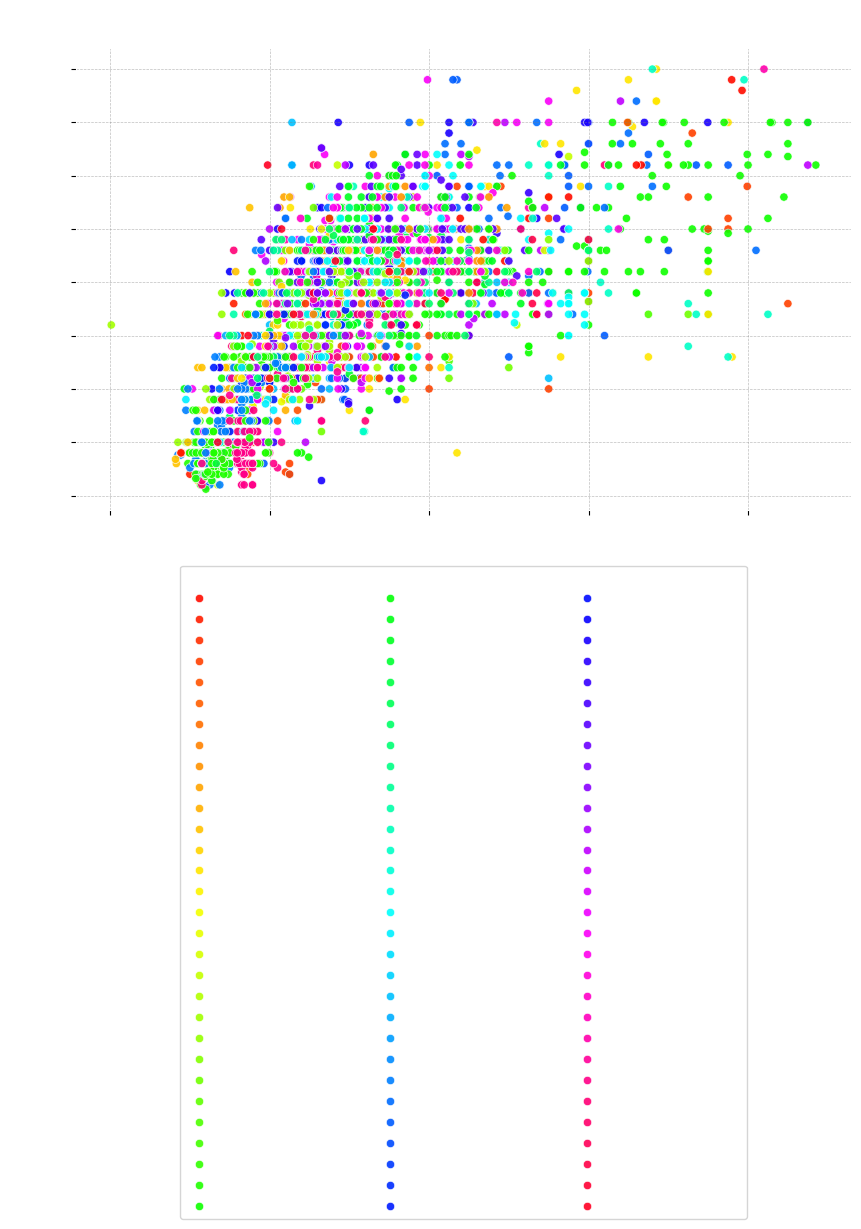

In [26]:
plt.figure(figsize=(10, 6), facecolor="none")

sns.scatterplot(
    x="house_price", 
    y="net_area", 
    hue="neighborhood", 
    data=df,
    palette="hsv",  
    edgecolor="white",  
    alpha=0.9  
)

plt.xlabel("Ev Fiyatları (Milyon TL)", fontsize=14, color="white")  
plt.ylabel("Net Alan (m²)", fontsize=14, color="white")  
plt.title("Mahallelere Göre Ev Fiyatları ve Net Alan Dağılımı", fontsize=16, color="white", pad=15)  

plt.xticks(fontsize=12, color="white")  
plt.yticks(fontsize=12, color="white")  


plt.gca().spines["bottom"].set_color("white")
plt.gca().spines["left"].set_color("white")
plt.gca().spines["top"].set_color("white")
plt.gca().spines["right"].set_color("white")


plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.5)


plt.gca().patch.set_alpha(0)
plt.gca().yaxis.get_offset_text().set_color("white")
plt.gca().xaxis.get_offset_text().set_color("white")

legend = plt.legend(
    title="Mahalle", fontsize=10,  
    bbox_to_anchor=(0.5, -0.12), loc="upper center",
    ncol=3,
    borderaxespad=0  
)
plt.setp(legend.get_texts(), color="white")  
legend.get_title().set_color("white")  


save_path = os.path.join(save_dir, "house_price_vs_net_area_by_neighborhood.png")
plt.savefig(save_path, transparent=True, dpi=300, bbox_inches="tight")

plt.show()


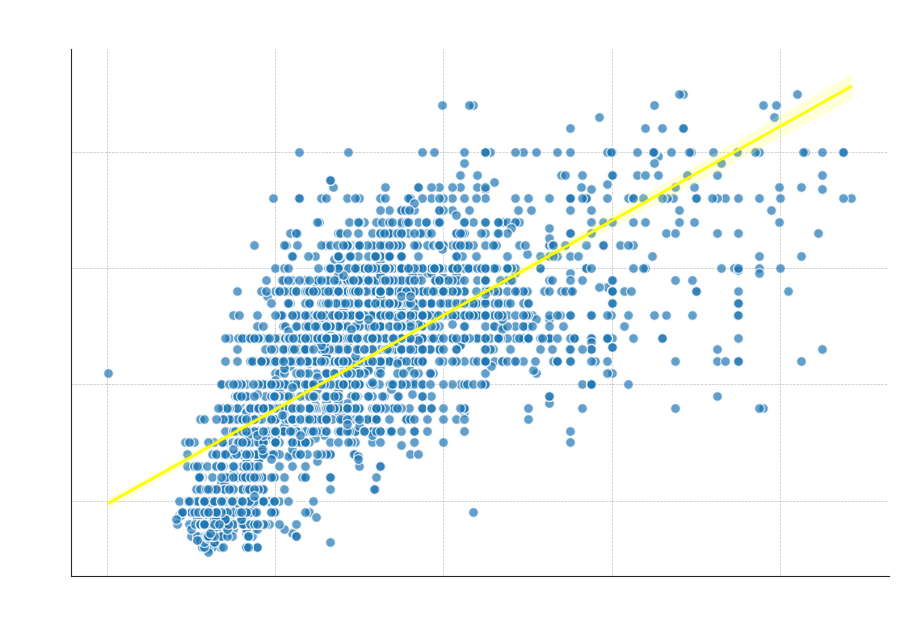

In [27]:
sns.set_style("white") 

g = sns.lmplot(
    x="house_price", 
    y="net_area", 
    data=df,
    palette="viridis", 
    height=6, aspect=1.5,  
    scatter_kws={"edgecolor": "white", "alpha": 0.7, "s": 50}, 
    line_kws={"color": "yellow", "lw": 2}  
)


g.set_axis_labels("Ev Fiyatları (Milyon TL)", "Net Alan (m²)", fontsize=14, color="white")
plt.title("Ev Fiyatları ile Net Alan Arasındaki İlişki", fontsize=16, color="white", pad=15)


plt.xticks(fontsize=12, color="white")
plt.yticks(fontsize=12, color="white")


plt.gca().patch.set_alpha(0)
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.5)



plt.gca().xaxis.get_offset_text().set_color("white")  


save_path = os.path.join(save_dir, "house_price_vs_net_area_regression.png")
plt.savefig(save_path, transparent=True, dpi=300, bbox_inches="tight")

plt.show()


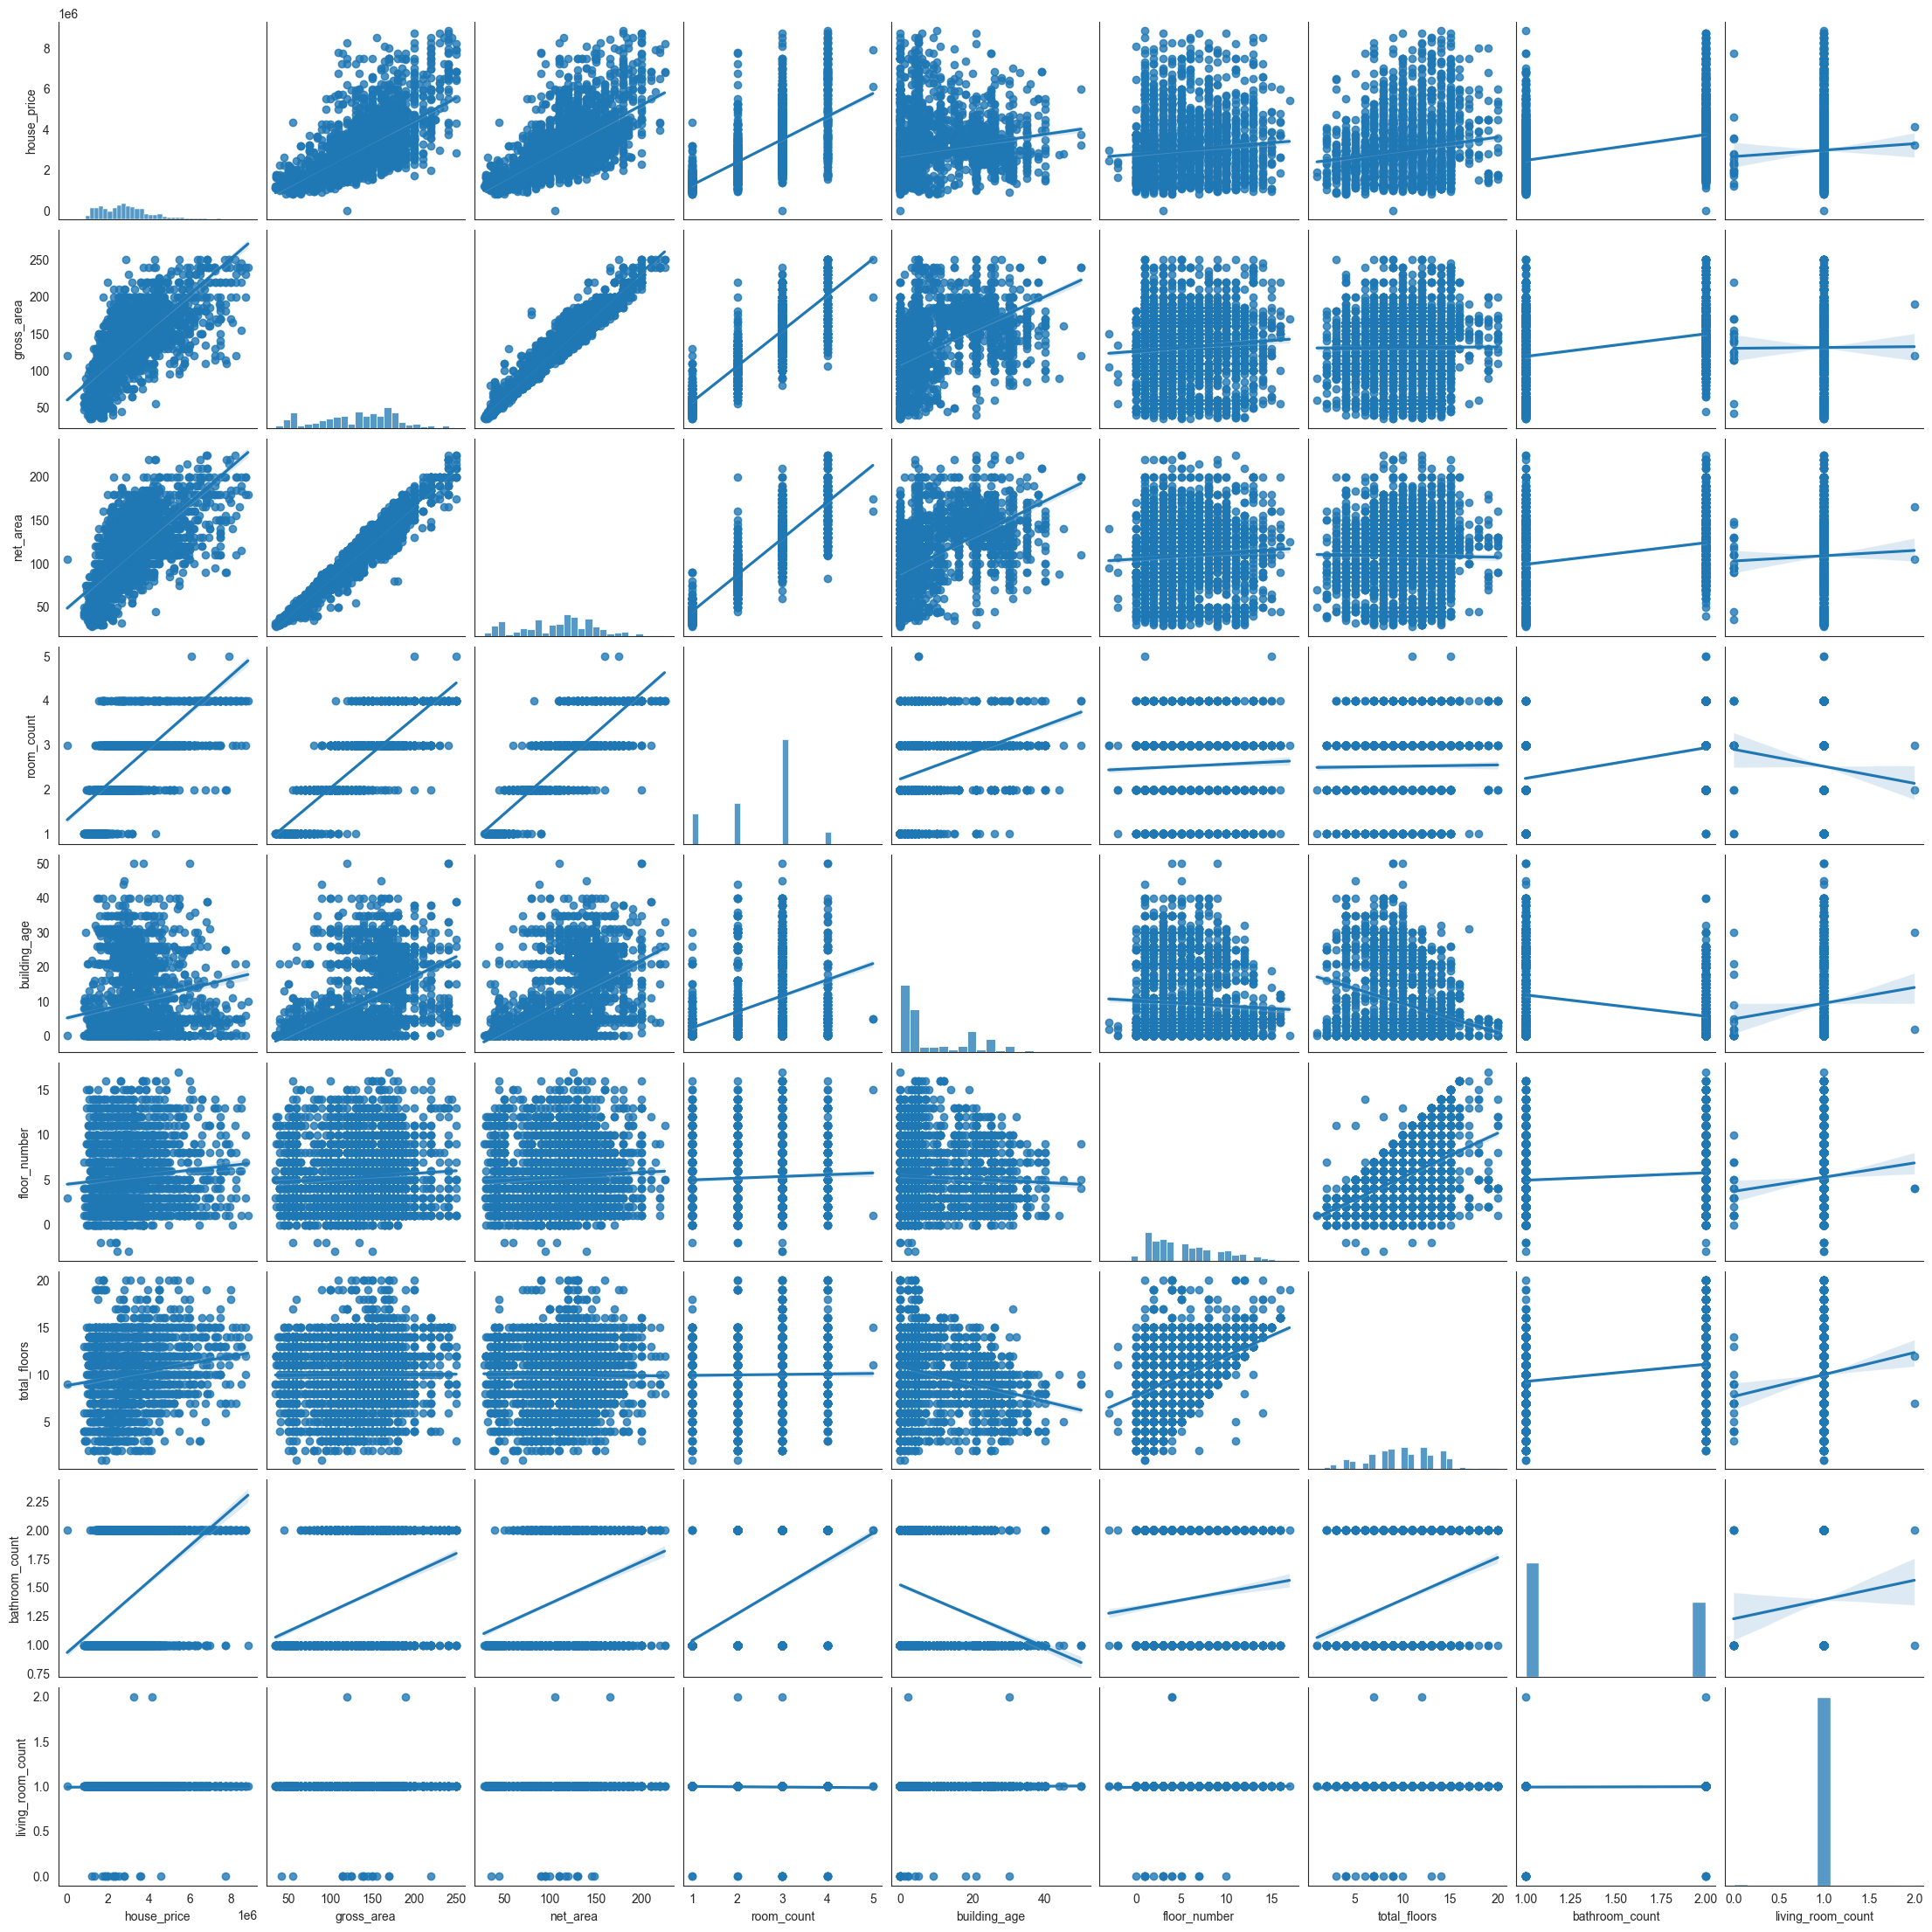

In [28]:
sns.pairplot(df, palette="hsv", kind="reg")

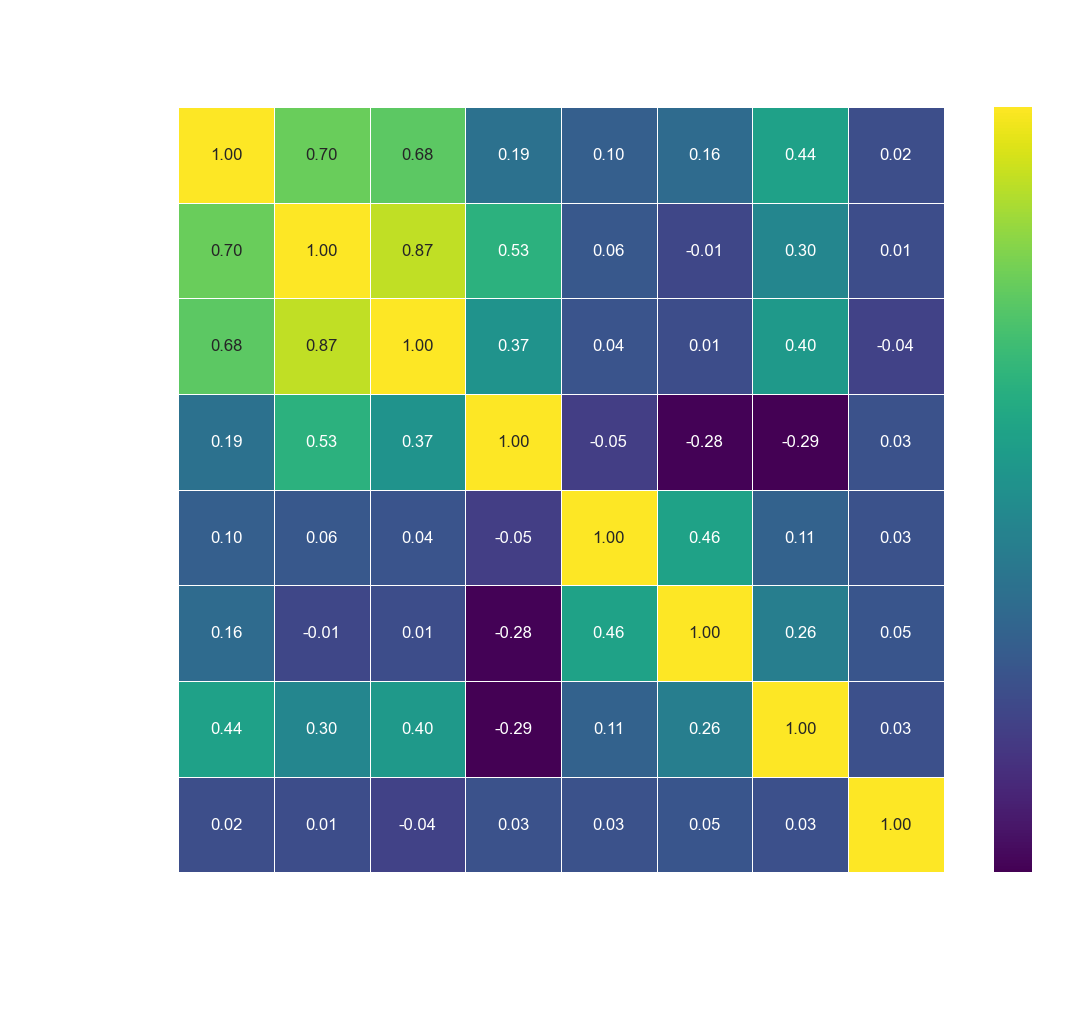

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_c = df.copy()


numeric_df = df_c.select_dtypes(include=[np.number])

corr = numeric_df.drop("gross_area", axis=1).corr()

plt.figure(figsize=(12, 10))


ax = sns.heatmap(
    corr, annot=True, fmt=".2f", cmap="viridis", square=True,
    linewidths=0.5, cbar=True, annot_kws={"size": 12}
)


cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_tick_params(color="white")  
plt.setp(plt.getp(cbar.ax, "yticklabels"), color="white") 


plt.title("Özellikler Arası Korelasyon Matrisi", fontsize=22, y=1.08, color="white")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=14, color="white")
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, color="white")


ax.xaxis.label.set_color("white")
ax.yaxis.label.set_color("white")


for spine in ax.spines.values():
    spine.set_edgecolor("white")


ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("white")
ax.spines["bottom"].set_color("white")

ax.tick_params(axis="x", colors="white")
ax.tick_params(axis="y", colors="white")

plt.gcf().patch.set_alpha(0)  

plt.tight_layout()

save_path = os.path.join(save_dir, "correlation_matrix_heatmap.png")
plt.savefig(save_path, transparent=True, dpi=300, bbox_inches="tight")

plt.show()


In [30]:
df_p = df.pivot_table(index="building_age", columns="district", values="house_price", fill_value=0)


In [31]:
df_p

district,kozan,sarıçam,seyhan,çukurova
building_age,,,,
0,2.412041e+06,1.759692e+06,4.261607e+06,4.571219e+06
1,2.168000e+06,1.927952e+06,4.247667e+06,5.110000e+06
2,2.190000e+06,1.968133e+06,3.358971e+06,4.200000e+06
3,0.000000e+00,2.118090e+06,4.350143e+06,3.954812e+06
4,3.125000e+06,2.238131e+06,4.035038e+06,4.012560e+06
5,2.498667e+06,2.209085e+06,4.201457e+06,3.834870e+06
6,2.750000e+06,2.134231e+06,4.162963e+06,3.779000e+06
7,2.850000e+06,1.728333e+06,4.062500e+06,3.752857e+06
8,0.000000e+00,1.738667e+06,4.308000e+06,4.155000e+06


<Axes: xlabel='district', ylabel='building_age'>

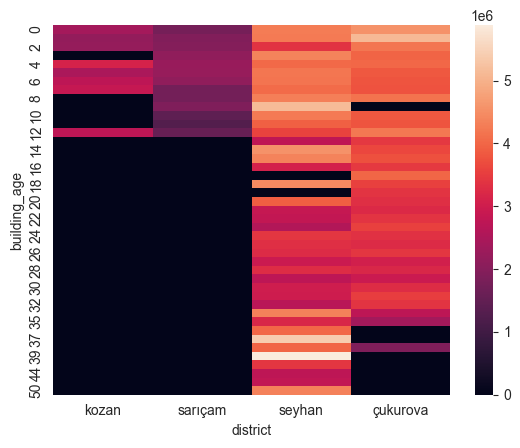

In [32]:
sns.heatmap(df_p)

<Axes: xlabel='house_price', ylabel='building_age'>

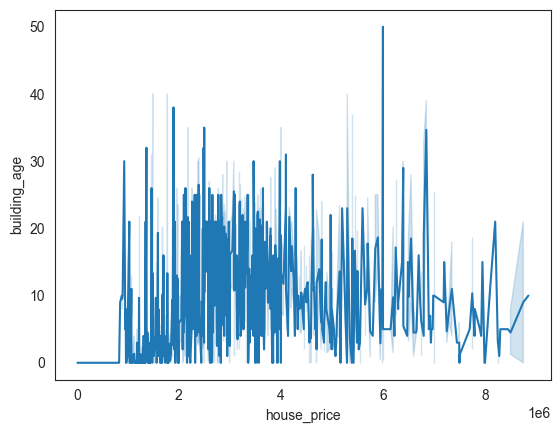

In [33]:
sns.lineplot(x="house_price", y="building_age", data=df)

<Axes: xlabel='house_price', ylabel='net_area'>

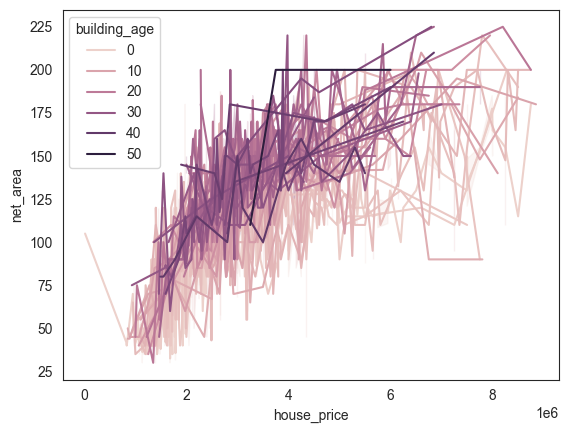

In [34]:
sns.lineplot(x="house_price", y="net_area", hue="building_age", data=df)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3176 entries, 0 to 3175
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   house_description  3176 non-null   object  
 1   house_price        3176 non-null   int64   
 2   property_type      3176 non-null   category
 3   gross_area         3176 non-null   int64   
 4   net_area           3176 non-null   int64   
 5   room_count         3176 non-null   int64   
 6   building_age       3176 non-null   int64   
 7   floor_number       3176 non-null   int64   
 8   total_floors       3176 non-null   int64   
 9   heating            3176 non-null   category
 10  bathroom_count     3176 non-null   int64   
 11  furnished          3176 non-null   category
 12  usage_status       3176 non-null   object  
 13  credit_eligible    3176 non-null   category
 14  deed_status        3176 non-null   category
 15  exchange           3176 non-null   object  
 16  house_

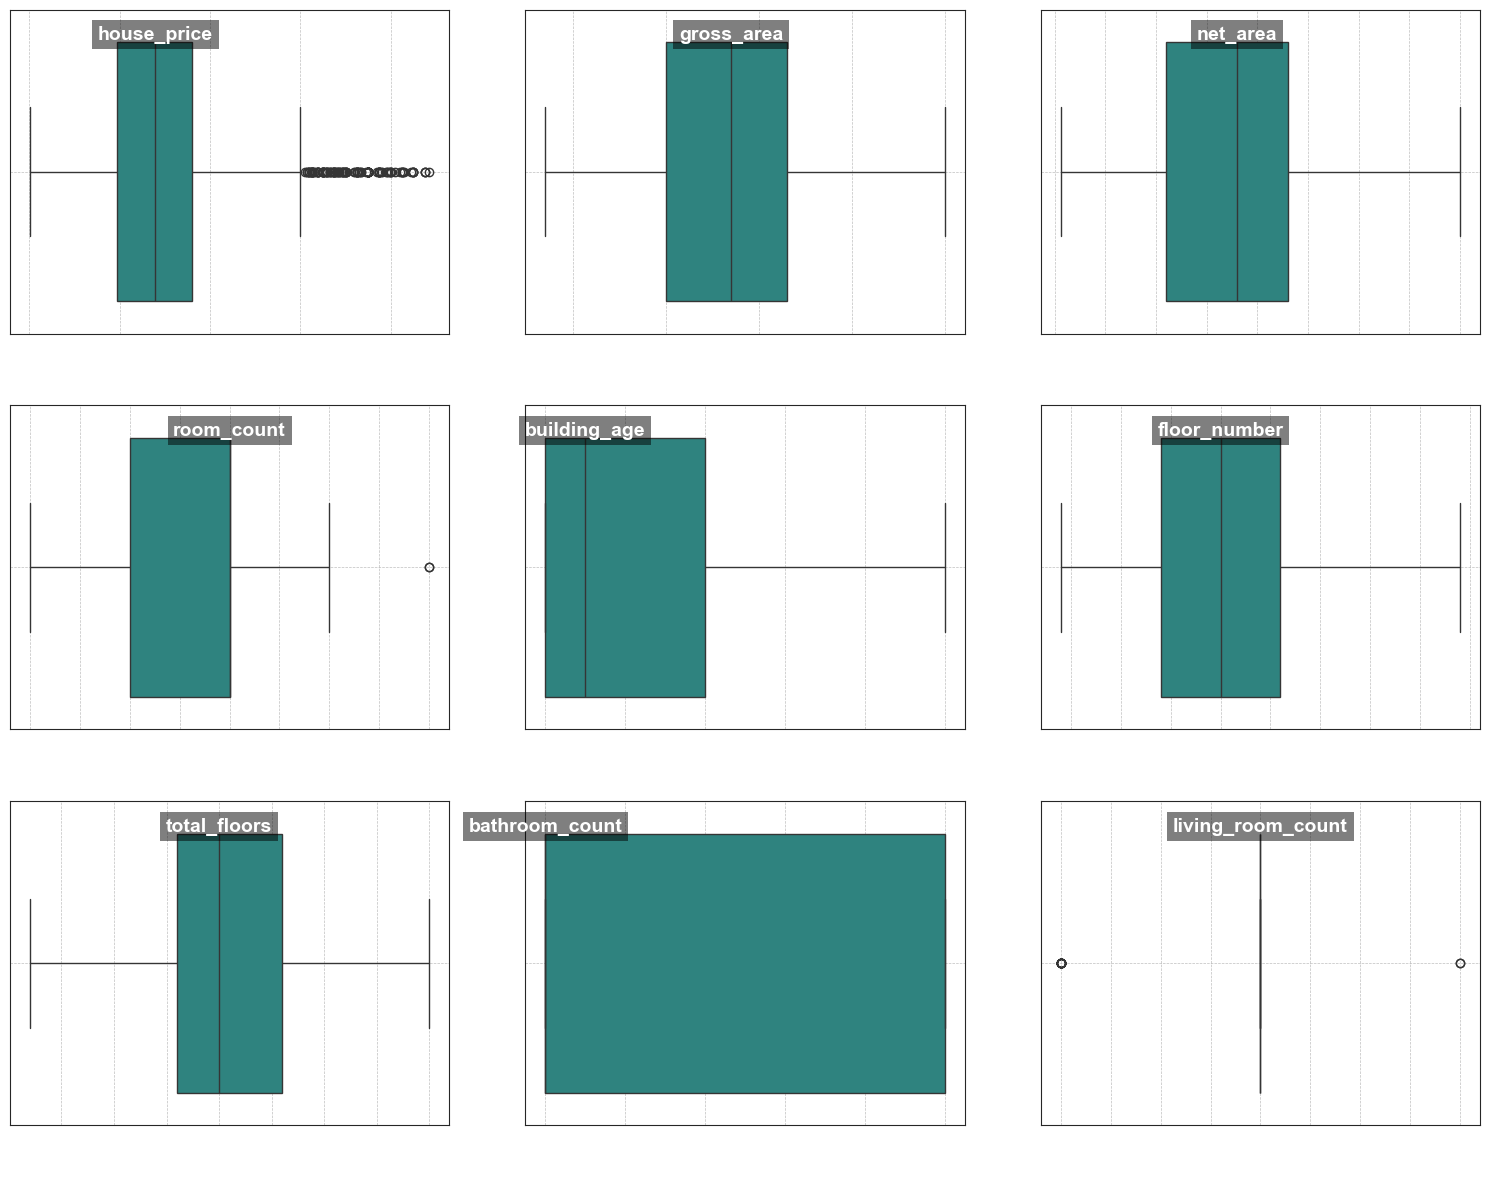

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# **Sadece int64 türündeki sütunları seç**
int_cols = df.select_dtypes(include=["int64"]).columns

# **Kaç satır olması gerektiğini hesapla (3 sütun olacak)**
n_cols = 3
n_rows = math.ceil(len(int_cols) / n_cols)  # Satır sayısı

# **Figure Boyutunu Ayarla**
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # **Dizi şeklinde erişebilmek için düzleştir**

# **Döngü ile tüm değişkenler için boxplot çiz**
for i, col in enumerate(int_cols):
    sns.boxplot(x=df[col], palette="viridis", ax=axes[i])  # Boxplot çiz
    axes[i].set_xlabel(col, fontsize=12, color="white")  # **X ekseninde kolon adını göster**
    axes[i].tick_params(axis="x", colors="white", labelrotation=45)  # **X etiketlerini döndür**
    axes[i].tick_params(axis="y", colors="white")  
    axes[i].grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.5)  

    # **Kolon ismini grafik üstüne ekle**
    axes[i].text(
        x=df[col].median(),  
        y=axes[i].get_ylim()[1] * 0.9,  
        s=col, fontsize=14, color="white", fontweight="bold",
        ha="center", va="top", bbox=dict(facecolor="black", alpha=0.5, edgecolor="none")
    )

# **Boş kalan eksenleri kapat (eğer toplam değişken sayısı 3'ün katı değilse)**
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<Axes: xlabel='net_area'>

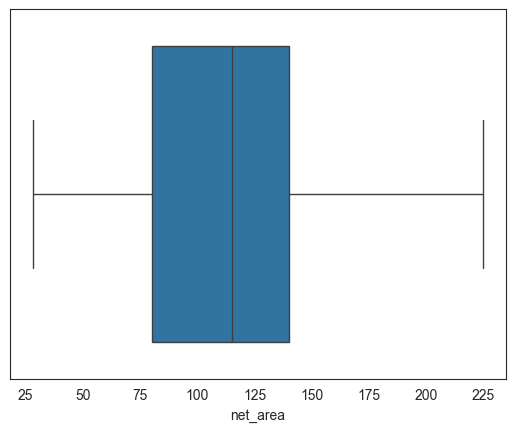

In [37]:
sns.boxplot(x=df["net_area"])

<Axes: xlabel='gross_area'>

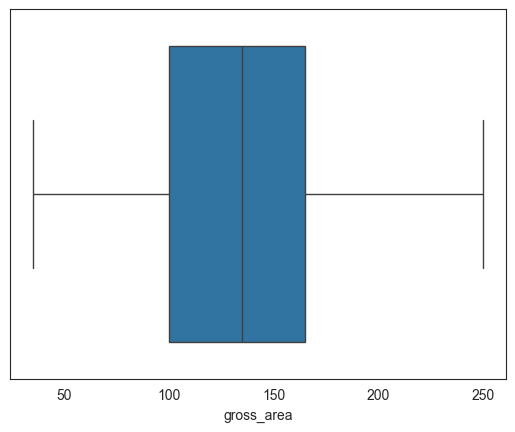

In [38]:
sns.boxplot(x=df["gross_area"])


<Axes: xlabel='house_price'>

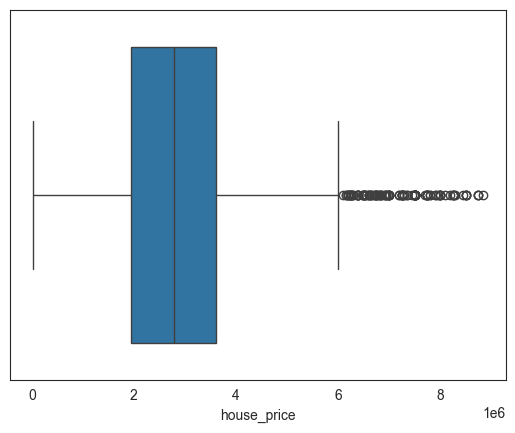

In [39]:
sns.boxplot(x=df["house_price"])

<Axes: xlabel='floor_number'>

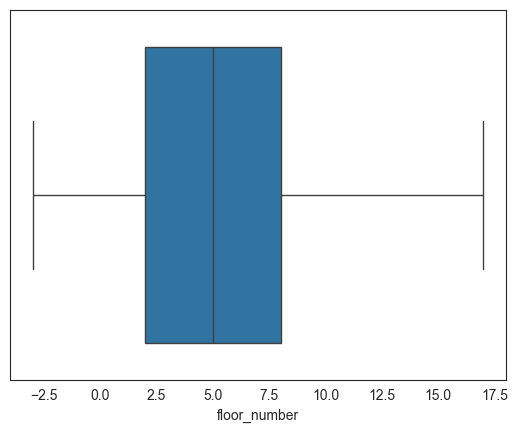

In [40]:
sns.boxplot(x=df["floor_number"])

<Axes: xlabel='total_floors'>

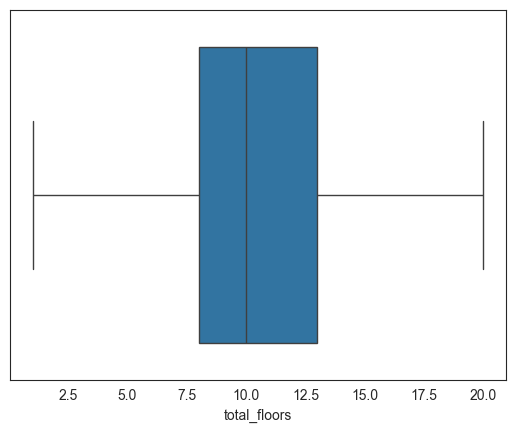

In [41]:
sns.boxplot(x=df["total_floors"])


<Axes: xlabel='building_age'>

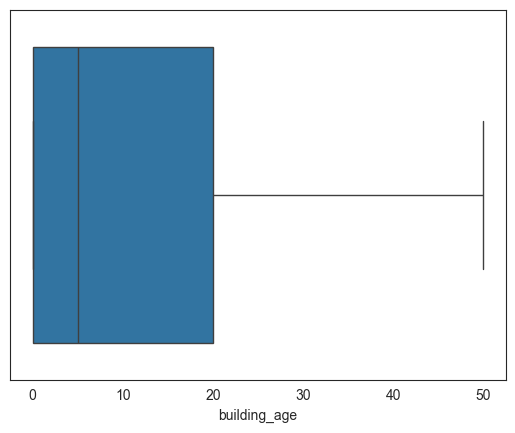

In [42]:
sns.boxplot(x=df["building_age"])

<Axes: xlabel='room_count'>

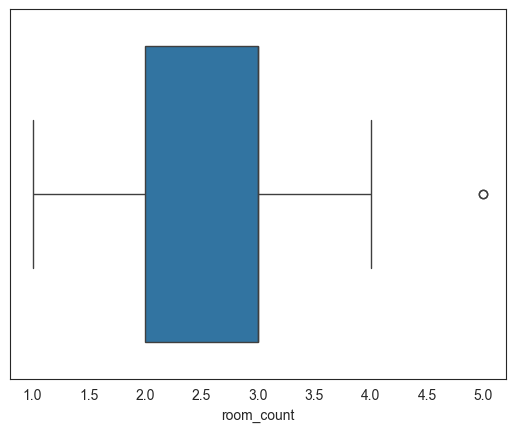

In [43]:
sns.boxplot(x=df["room_count"])


<Axes: xlabel='living_room_count'>

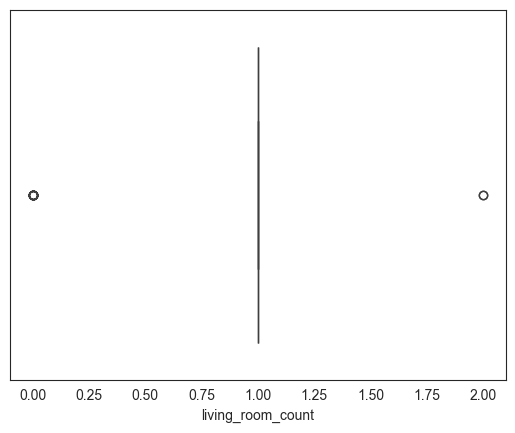

In [44]:
sns.boxplot(x=df["living_room_count"])

<Axes: xlabel='bathroom_count'>

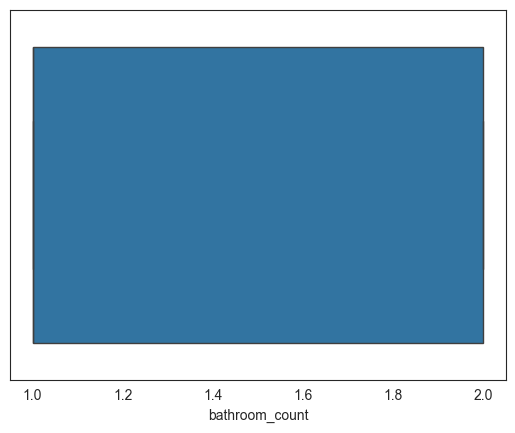

In [45]:
sns.boxplot(x=df["bathroom_count"])

<Axes: xlabel='house_price'>

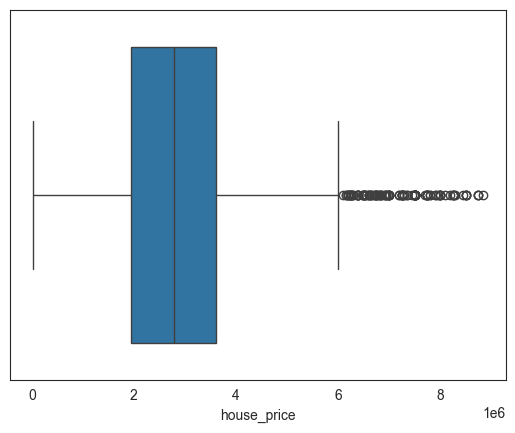

In [46]:
sns.boxplot(x=df["house_price"])